In [21]:
import xlwings as xw
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

# One way sensitivity analysis (±25%)

In [69]:
df = pd.DataFrame(results)
df["icer_delta"] = df["icer_upper"] - df["icer_lower"]
# sort by the delta of ICER
df = df.sort_values(by=['icer_delta'])
df

,parameter,base case input,change,owsa_input_lower,owsa_input_upper,icer_lower,icer_upper,icer_delta
33,cPFS_PALB_After_AEs,0.000000,"(0.75, 1.25)",0.000000,0.000000,117354.556468,117354.556468,0.000000e+00
25,cPFS_CAPI_After_AEs,0.000000,"(0.75, 1.25)",0.000000,0.000000,117354.556468,117354.556468,0.000000e+00
0,cohortSize,660.000000,"(0.75, 1.25)",495.000000,825.000000,117354.556468,117354.556468,5.820766e-11
10,duAE2_PALB,-0.003000,"(0.75, 1.25)",-0.003750,-0.002250,117345.338646,117363.775737,1.843709e+01
8,duAE3_CAPI,-0.060000,"(0.75, 1.25)",-0.075000,-0.045000,117343.474057,117365.640972,2.216692e+01
14,fAE3_CAPI,0.023000,"(0.75, 1.25)",0.017250,0.028750,117334.946858,117374.177611,3.923075e+01
29,cPFS_PALB_1st_AEs,39.557870,"(0.75, 1.25)",29.668402,49.447337,117322.069411,117387.043524,6.497411e+01
13,fAE2_CAPI,0.093000,"(0.75, 1.25)",0.069750,0.116250,117307.350814,117401.743539,9.439273e+01
2,tpPFS2D,0.000175,"(0.75, 1.25)",0.000132,0.000219,117299.703886,117409.442007,1.097381e+02
6,duAE1_CAPI,-0.057000,"(0.75, 1.25)",-0.071250,-0.042750,117299.189408,117409.975820,1.107864e+02


([<matplotlib.axis.YTick at 0x18ee2bdafe0>,
 [Text(0, 0, 'cPFS_PALB_After_AEs  [±25%]'),
  Text(0, 1, 'cPFS_CAPI_After_AEs  [±25%]'),
  Text(0, 2, 'cohortSize  [±25%]'),
  Text(0, 3, 'duAE2_PALB  [±25%]'),
  Text(0, 4, 'duAE3_CAPI  [±25%]'),
  Text(0, 5, 'fAE3_CAPI  [±25%]'),
  Text(0, 6, 'cPFS_PALB_1st_AEs  [±25%]'),
  Text(0, 7, 'fAE2_CAPI  [±25%]'),
  Text(0, 8, 'tpPFS2D  [±25%]'),
  Text(0, 9, 'duAE1_CAPI  [±25%]'),
  Text(0, 10, 'cPFS_CAPI_1st_AEs  [±25%]'),
  Text(0, 11, 'duAE2_CAPI  [±25%]'),
  Text(0, 12, 'duAE3_PALB  [±25%]'),
  Text(0, 13, 'fAE1_CAPI  [±25%]'),
  Text(0, 14, 'cPFS_CAPI_1st_Adm  [±25%]'),
  Text(0, 15, 'cPFS_PALB_1st_Adm  [±25%]'),
  Text(0, 16, 'fAE2_PALB  [±25%]'),
  Text(0, 17, 'cP  [±25%]'),
  Text(0, 18, 'fAE3_PALB  [±25%]'),
  Text(0, 19, 'cPFS_PALB_1st_Mor  [±25%]'),
  Text(0, 20, 'cPFS_CAPI_1st_Mor  [±25%]'),
  Text(0, 21, 'tpP2D  [±25%]'),
  Text(0, 22, 'duAE1_PALB  [±25%]'),
  Text(0, 23, 'uP  [±25%]'),
  Text(0, 24, 'rdis_Month  [±25%]'),
  Text(0, 

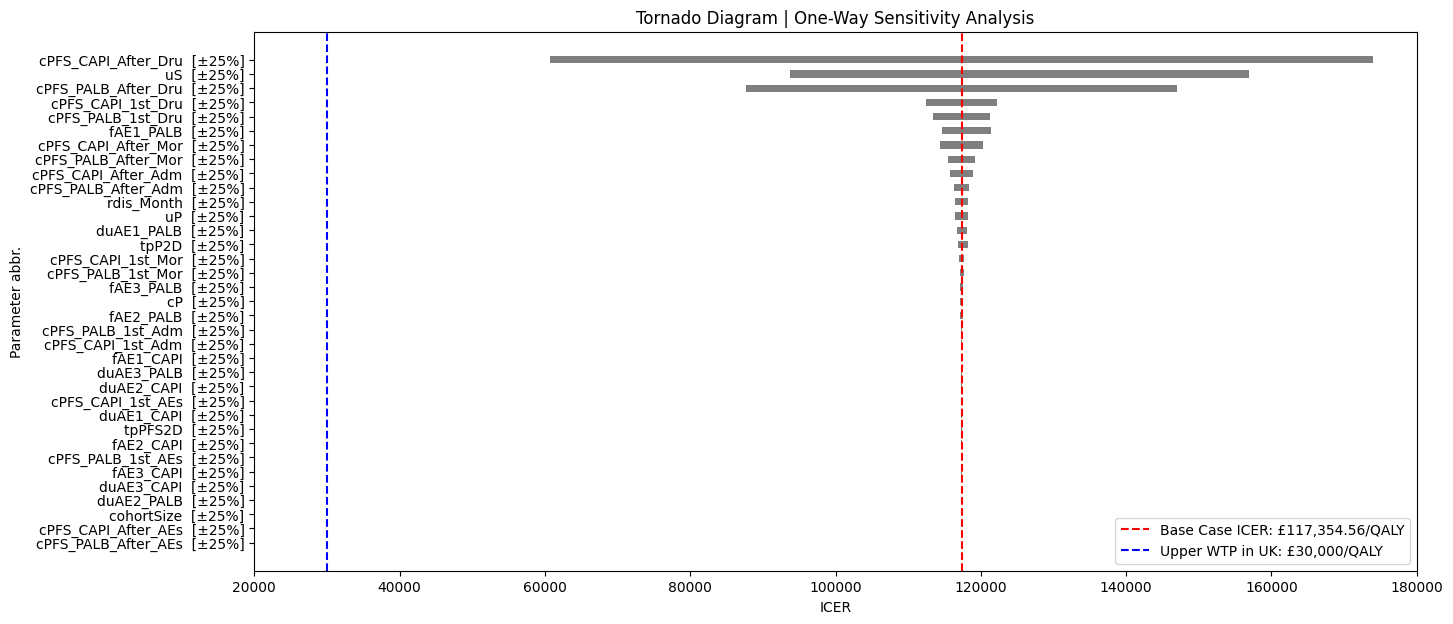

In [81]:
# tornado plot
# each parameter is a bar
# the bar is the range of ICER
# the base case ICER is the red line
# the base case input is the red dot
# the range of input is the blue line

y_pos = np.arange(len(df['parameter']))
plt.figure(figsize=(15, 7))
plt.barh(y_pos, left=df['icer_lower'], width=df['icer_delta'], height=0.5, align='center', alpha=0.5, color='black')

plt.axvline(x=117354.56, color='red', linestyle='--', label='Base Case ICER: £117,354.56/QALY')
plt.axvline(x=30000, color='blue', linestyle='--', label='Upper WTP in UK: £30,000/QALY')

plt.legend()
plt.xlabel('ICER')
plt.ylabel('Parameter abbr.')
plt.title('Tornado Diagram | One-Way Sensitivity Analysis')
plt.xlim(20000, 180000)

y_labels = [ _+"  [±25%]" for _ in df['parameter']]
plt.yticks(y_pos, y_labels)


In [83]:
pd.DataFrame(results).to_excel('owsa_results.xlsx')